In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

pyber_data = pd.merge(city_data_df, ride_data_df, on="city")

# Display the data table for preview
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [2]:
#create dataframe for urban, suburban, and rural
pyber_urban = pyber_data.loc[pyber_data["type"] == "Urban", :]
pyber_suburban = pyber_data.loc[pyber_data["type"] == "Suburban", :]
pyber_rural = pyber_data.loc[pyber_data["type"] == "Rural", :]

#calculate average fare, total number of rides of Urban
avg_fare_urban = pyber_urban.groupby(['city']).mean()['fare']
total_rides_urban = pyber_urban.groupby(['city']).count()['ride_id']
total_drivers_urban = pyber_urban.groupby(['city'])['driver_count']

#calculate average fare, total number of rides of Suburban
avg_fare_suburban = pyber_suburban.groupby(['city']).mean()['fare']
total_rides_suburban = pyber_suburban.groupby(['city']).count()['ride_id']
total_drivers_suburban = pyber_suburban.groupby(['city'])['driver_count']

#calculate average fare, total number of rides of Rural
avg_fare_rural = pyber_rural.groupby(['city']).mean()['fare']
total_rides_rural = pyber_rural.groupby(['city']).count()['ride_id']
total_drivers_rural = pyber_rural.groupby(['city'])['driver_count']

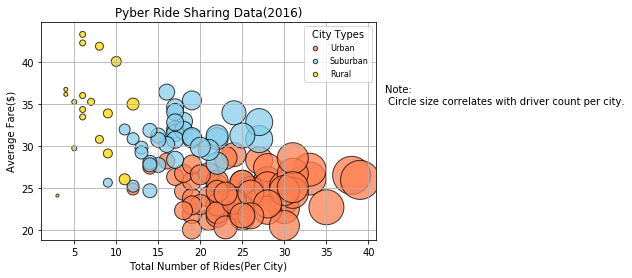

In [3]:
# Obtain the x and y coordinates for each of the three city types
x_axis_urban = total_rides_urban
y_axis_urban = avg_fare_urban

x_axis_suburban = total_rides_suburban
y_axis_suburban = avg_fare_suburban

x_axis_rural = total_rides_rural
y_axis_rural = avg_fare_rural

# Build the scatter plots for each city types
plt.scatter(x_axis_urban, y_axis_urban, marker="o", facecolors="coral", edgecolors="black",
            s=x_axis_urban**2, alpha=0.75, linewidth=1, label='Urban')

plt.scatter(x_axis_suburban, y_axis_suburban, marker="o", facecolors="skyblue", edgecolors="black",
            s=x_axis_suburban**2, alpha=0.75, linewidth=1, label='Suburban')

plt.scatter(x_axis_rural, y_axis_rural, marker="o", facecolors="gold", edgecolors="black",
            s=x_axis_rural**2, alpha=0.75, linewidth=1, label='Rural')


# Set a grid on the plot
plt.grid()

# Create legends
lgnd = plt.legend(loc="upper right", title = "City Types", fontsize =8)
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
lgnd.legendHandles[2]._sizes = [20]
# lgnd.legendHandles[0]._legmarker.set_markersize(6)


# Incorporate the other graph properties

# Incorporate a text label regarding circle size
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.text(42,35, "Note: \n Circle size correlates with driver count per city.", fontsize =10 )


# Save Figure
plt.savefig("Pyber Ride Sharing Data.png")
plt.show()

## Total Fares by City Type

In [4]:
# Calculate Type Percents
total_fare = pyber_data['fare'].sum()
total_fare_urban = pyber_urban['fare'].sum()
total_fare_suburban = pyber_suburban['fare'].sum()
total_fare_rural = pyber_rural['fare'].sum()

In [27]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [total_fare_urban, total_fare_suburban, total_fare_rural]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.2, 0, 0)
#change the explode number to make the explode bigger or smaller

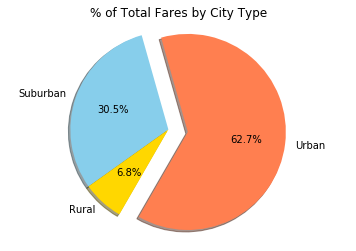

In [32]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=240)

# Incorporate a text label regarding circle size
plt.title("% of Total Fares by City Type")
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Save Figure
plt.savefig("% of Total Fares by City Type.png")
plt.show()

## Total Rides by City Type

In [11]:
# Calculate Ride Percents
total_rides =  pyber_data['ride_id'].count()
total_rides_urban = pyber_urban['ride_id'].count()
total_rides_suburban = pyber_suburban['ride_id'].count()
total_rides_rural = pyber_rural['ride_id'].count()

In [12]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [total_rides_urban, total_rides_suburban, total_rides_rural]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.2, 0, 0)
#change the explode number to make the explode bigger or smaller

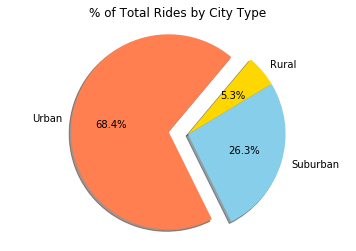

In [13]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=50)

# Incorporate a text label regarding circle size
plt.title("% of Total Rides by City Type")
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Save Figure
plt.savefig("% of Total Rides by City Type.png")
plt.show()

## Total Drivers by City Type

In [14]:
# Calculate Driver Percents
total_drivers = pyber_data['driver_count'].nunique()
total_drivers_urban = pyber_urban['driver_count'].nunique()
total_drivers_suburban = pyber_suburban['driver_count'].nunique()
total_drivers_rural = pyber_rural['driver_count'].nunique()

In [45]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [total_drivers_urban, total_drivers_suburban, total_drivers_rural]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.2, 0, 0)
#change the explode number to make the explode bigger or smaller

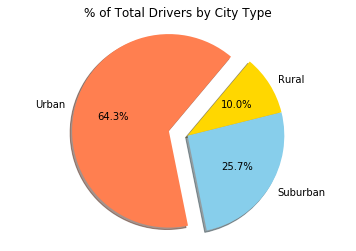

In [46]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=50)

# Incorporate a text label regarding circle size
plt.title("% of Total Drivers by City Type")
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Save Figure
plt.savefig("% of Total Drivers by City Type.png")
plt.show()